# Customer Segmentation with RFM

This project performs customer segmentation with recency, frequency and monetary value. The dataset has been downloaded from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv(r"C:\Users\praja\OneDrive\Desktop\Customer Segmentation with RFM\retail_.csv")

In [3]:
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
# Converting date columns' type

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [7]:
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [8]:
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [9]:
retail['date'] = pd.to_datetime(retail['date'])

## Calculating Recency:

In [10]:
# Calculating the recentmost date of the dataset

max_date = retail['date'].max()

In [11]:
max_date

Timestamp('2011-12-09 00:00:00')

In [12]:
# Grouping by customer ID, to view each customer's last purchase date

customers_recency = retail.groupby('Customer ID').agg(last_date = ('date', 'max')).reset_index()

In [13]:
customers_recency

,Customer ID,last_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
5876,18283.0,2011-12-06
5877,18284.0,2010-10-04
5878,18285.0,2010-02-17
5879,18286.0,2010-08-20


In [14]:
# Finding out Recency

customers_recency['recency'] = max_date - customers_recency['last_date']

In [15]:
customers_recency

,Customer ID,last_date,recency
0,12346.0,2011-01-18,325 days
1,12347.0,2011-12-07,2 days
2,12348.0,2011-09-25,75 days
3,12349.0,2011-11-21,18 days
4,12350.0,2011-02-02,310 days
...,...,...,...
5876,18283.0,2011-12-06,3 days
5877,18284.0,2010-10-04,431 days
5878,18285.0,2010-02-17,660 days
5879,18286.0,2010-08-20,476 days


In [29]:
# Converting Recency values to integer

customers_recency['recency'] = customers_recency['recency'].astype('string').str.replace('days','').astype(int)

In [30]:
customers_recency['recency']

0       325
1         2
2        75
3        18
4       310
       ... 
5876      3
5877    431
5878    660
5879    476
5880     42
Name: recency, Length: 5881, dtype: int32

## Calculating Frequency

In [34]:
freq1 = retail.groupby(['Customer ID', 'Invoice']).agg(count=('Description', 'count')).reset_index()

In [35]:
freq1

,Customer ID,Invoice,count
0,12346.0,491725,1
1,12346.0,491742,1
2,12346.0,491744,1
3,12346.0,492718,1
4,12346.0,492722,1
...,...,...,...
36970,18287.0,523290,2
36971,18287.0,534346,10
36972,18287.0,554065,29
36973,18287.0,570715,38


In [36]:
freq2 = freq1.groupby('Customer ID').agg(frequency=('count','count')).reset_index()
freq2

,Customer ID,frequency
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1
...,...,...
5876,18283.0,22
5877,18284.0,1
5878,18285.0,1
5879,18286.0,2


## Calculating Monetary Value

In [37]:
monet1 = retail.groupby(['Customer ID', 'Invoice']).agg(revenue = ('Revenue', 'sum')).reset_index()

In [38]:
monet1

,Customer ID,Invoice,revenue
0,12346.0,491725,45.00
1,12346.0,491742,22.50
2,12346.0,491744,22.50
3,12346.0,492718,22.50
4,12346.0,492722,1.00
...,...,...,...
36970,18287.0,523290,30.60
36971,18287.0,534346,381.50
36972,18287.0,554065,765.28
36973,18287.0,570715,1001.32


In [39]:
# Avg revenue per customer

monet2 = monet1.groupby('Customer ID').agg(monetary = ('revenue', 'mean')).reset_index()
monet2

,Customer ID,monetary
0,12346.0,6463.038333
1,12347.0,615.191250
2,12348.0,403.880000
3,12349.0,1107.172500
4,12350.0,334.400000
...,...,...
5876,18283.0,121.131818
5877,18284.0,461.680000
5878,18285.0,427.000000
5879,18286.0,648.215000


## Ranking each customer based on Recency:

In [40]:
# The lower the Recency rank, the better. 
# (It means that it wasn't too long when the customer made a purchase)

customers_recency['rank_recency'] = customers_recency['recency'].rank()

In [42]:
customers_recency

,Customer ID,last_date,recency,rank_recency
0,12346.0,2011-01-18,325,4177.5
1,12347.0,2011-12-07,2,183.5
2,12348.0,2011-09-25,75,2694.0
3,12349.0,2011-11-21,18,1130.5
4,12350.0,2011-02-02,310,4112.5
...,...,...,...,...
5876,18283.0,2011-12-06,3,275.5
5877,18284.0,2010-10-04,431,4889.5
5878,18285.0,2010-02-17,660,5688.5
5879,18286.0,2010-08-20,476,5109.0


## Ranking each customer based on (purchase) Frequency:

In [43]:
# The higher the purchase frequency, the better

freq2['freq_ranking'] = freq2['frequency'].rank(ascending = False)
freq2

,Customer ID,frequency,freq_ranking
0,12346.0,12,697.5
1,12347.0,8,1214.0
2,12348.0,5,1981.5
3,12349.0,4,2404.5
4,12350.0,1,5068.5
...,...,...,...
5876,18283.0,22,266.5
5877,18284.0,1,5068.5
5878,18285.0,1,5068.5
5879,18286.0,2,3783.5


## Ranking each customer on Monetary Value:

In [44]:
# The higher the monetary value, the better

monet2['rank_monet'] = monet2['monetary'].rank(ascending = False)
monet2

,Customer ID,monetary,rank_monet
0,12346.0,6463.038333,9.0
1,12347.0,615.191250,624.0
2,12348.0,403.880000,1547.0
3,12349.0,1107.172500,168.0
4,12350.0,334.400000,2208.0
...,...,...,...
5876,18283.0,121.131818,5248.0
5877,18284.0,461.680000,1173.0
5878,18285.0,427.000000,1385.0
5879,18286.0,648.215000,563.0


## Performing a join on all RCM data:

In [45]:
all_data = pd.merge(customers_recency,freq2, how = 'left', on = 'Customer ID')
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking
0,12346.0,2011-01-18,325,4177.5,12,697.5
1,12347.0,2011-12-07,2,183.5,8,1214.0
2,12348.0,2011-09-25,75,2694.0,5,1981.5
3,12349.0,2011-11-21,18,1130.5,4,2404.5
4,12350.0,2011-02-02,310,4112.5,1,5068.5
...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,275.5,22,266.5
5877,18284.0,2010-10-04,431,4889.5,1,5068.5
5878,18285.0,2010-02-17,660,5688.5,1,5068.5
5879,18286.0,2010-08-20,476,5109.0,2,3783.5


In [46]:
all_data = pd.merge(all_data, monet2, how = 'left', on = 'Customer ID')
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet
0,12346.0,2011-01-18,325,4177.5,12,697.5,6463.038333,9.0
1,12347.0,2011-12-07,2,183.5,8,1214.0,615.191250,624.0
2,12348.0,2011-09-25,75,2694.0,5,1981.5,403.880000,1547.0
3,12349.0,2011-11-21,18,1130.5,4,2404.5,1107.172500,168.0
4,12350.0,2011-02-02,310,4112.5,1,5068.5,334.400000,2208.0
...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,275.5,22,266.5,121.131818,5248.0
5877,18284.0,2010-10-04,431,4889.5,1,5068.5,461.680000,1173.0
5878,18285.0,2010-02-17,660,5688.5,1,5068.5,427.000000,1385.0
5879,18286.0,2010-08-20,476,5109.0,2,3783.5,648.215000,563.0


## Allocating the KPIs into three groups:

In [47]:
# Scaling ranked values into percentile

customers_recency['rank_recency'] = customers_recency['recency'].rank(pct=True)
freq2['freq_ranking'] = freq2['frequency'].rank(ascending = False, pct=True)
monet2['rank_monet'] = monet2['monetary'].rank(ascending = False, pct=True)

In [48]:
all_data = pd.merge(customers_recency,freq2, how = 'left', on = 'Customer ID')

In [49]:
all_data = pd.merge(all_data, monet2, how = 'left', on = 'Customer ID')
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet
0,12346.0,2011-01-18,325,0.710338,12,0.118602,6463.038333,0.001530
1,12347.0,2011-12-07,2,0.031202,8,0.206427,615.191250,0.106104
2,12348.0,2011-09-25,75,0.458085,5,0.336932,403.880000,0.263051
3,12349.0,2011-11-21,18,0.192229,4,0.408859,1107.172500,0.028567
4,12350.0,2011-02-02,310,0.699286,1,0.861843,334.400000,0.375446
...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,22,0.045315,121.131818,0.892365
5877,18284.0,2010-10-04,431,0.831406,1,0.861843,461.680000,0.199456
5878,18285.0,2010-02-17,660,0.967267,1,0.861843,427.000000,0.235504
5879,18286.0,2010-08-20,476,0.868730,2,0.643343,648.215000,0.095732


In [91]:
# Assigning groups and bins

bins = [0,0.5,1] # Added 1 to create interval
names = ['1', '2',] # 1, 2, 3 correspond to first group, second group and third group

In [78]:
# Creating new dataframe containing only customer IDs

final = pd.DataFrame(customers_recency['Customer ID'])
final

,Customer ID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0
...,...
5876,18283.0
5877,18284.0
5878,18285.0
5879,18286.0


In [92]:
final['frequency'] = pd.cut(freq2['freq_ranking'], bins, labels=names).astype('string')

In [93]:
final['recency'] = pd.cut(customers_recency['rank_recency'], bins, labels=names).astype('string')

In [94]:
final['monetary'] = pd.cut(monet2['rank_monet'], bins, labels=names).astype('string')

In [95]:
# Clubbing all three RCM values into one dataframe

final['rec_freq_mone'] = final['recency'] + final['frequency'] + final['monetary']

In [96]:
# 1 = first group, 2 = second group, 3 = third group

final

,Customer ID,frequency,recency,monetary,rec_freq_mone
0,12346.0,1,2,1,211
1,12347.0,1,1,1,111
2,12348.0,1,1,1,111
3,12349.0,1,1,1,111
4,12350.0,2,2,1,221
...,...,...,...,...,...
5876,18283.0,1,1,2,112
5877,18284.0,2,2,1,221
5878,18285.0,2,2,1,221
5879,18286.0,2,2,1,221


## The final RFM table:

In [99]:
all_data['rec_freq_monet'] = final['rec_freq_mone']
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_mone,rec_freq_monet
0,12346.0,2011-01-18,325,0.710338,12,0.118602,6463.038333,0.001530,211,211
1,12347.0,2011-12-07,2,0.031202,8,0.206427,615.191250,0.106104,111,111
2,12348.0,2011-09-25,75,0.458085,5,0.336932,403.880000,0.263051,211,111
3,12349.0,2011-11-21,18,0.192229,4,0.408859,1107.172500,0.028567,121,111
4,12350.0,2011-02-02,310,0.699286,1,0.861843,334.400000,0.375446,232,221
...,...,...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,22,0.045315,121.131818,0.892365,113,112
5877,18284.0,2010-10-04,431,0.831406,1,0.861843,461.680000,0.199456,331,221
5878,18285.0,2010-02-17,660,0.967267,1,0.861843,427.000000,0.235504,331,221
5879,18286.0,2010-08-20,476,0.868730,2,0.643343,648.215000,0.095732,321,221


## Visualizing the findings:

In [85]:
import seaborn as sns

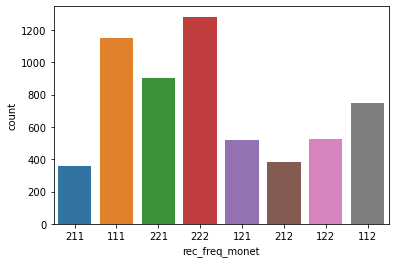

In [100]:
fig = sns.countplot(x='rec_freq_monet', data=all_data)